In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings

In [14]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, \
                            precision_score, recall_score
from sklearn.preprocessing import StandardScaler

import tensorflow_probability as tfp
tfd = tfp.distributions

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
df = pd.read_csv("F:/HAR/UMAFall/features_final.csv", index_col = 0)

In [3]:
df

,TimeStamp,SampleNo,X-Axis,Y-Axis,Z-Axis,SensorID,subject,activity_type,trial,ActivityEncoded,SensorTypeEncoded
32,102,1,-0.138750,0.886872,0.331029,0.0,1,0,1,0,0
33,102,2,-0.138140,0.886507,0.332372,0.0,1,0,1,0,0
34,102,3,-0.134844,0.889558,0.331150,0.0,1,0,1,0,0
35,102,4,-0.140215,0.886628,0.333714,0.0,1,0,1,0,0
36,102,5,-0.139117,0.886262,0.334568,0.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5587,14604,277,-60.833332,-8.333333,114.500000,4.0,19,1,6,15,2
5588,14687,278,-61.833332,-8.833333,115.000000,4.0,19,1,6,15,2
5589,14766,279,-60.500000,-7.500000,115.166664,4.0,19,1,6,15,2
5590,14867,280,-59.666668,-8.333333,115.500000,4.0,19,1,6,15,2


In [5]:
df.ActivityEncoded.value_counts()

13    460553
14    442755
15    399581
11    380650
12    375548
1     345003
8     327701
5     310488
9     301650
10    282320
4     282294
0     275204
6     173767
2     106039
3     104324
7       6570
Name: ActivityEncoded, dtype: int64

In [4]:
'''
F2 backwardFall 460553
F1 forwardFall 442755
F3 lateralFall 399581
A5 SittingGettingUpOnAChair 380650
A6 Walking 375548
A7 Bending 345003
A9 LyingDownOnABed 327701
A8 Hopping 310488
A3 MakingACall 301650
A4 OpeningDoor 282320
A2 HandsUp 282294
A1 Aplausing 275204
A11 Jogging 173767
A10 GoDownstairs 106039
A10 GoUpstairs 104324
A9 LyingDownGettingUpOnAChair 6570
'''

'\nF2 backwardFall 460553\nF1 forwardFall 442755\nF3 lateralFall 399581\nA5 SittingGettingUpOnAChair 380650\nA6 Walking 375548\nA7 Bending 345003\nA9 LyingDownOnABed 327701\nA8 Hopping 310488\nA3 MakingACall 301650\nA4 OpeningDoor 282320\nA2 HandsUp 282294\nA1 Aplausing 275204\nA11 Jogging 173767\nA10 GoDownstairs 106039\nA10 GoUpstairs 104324\nA9 LyingDownGettingUpOnAChair 6570\n'

<AxesSubplot:xlabel='activity_type', ylabel='count'>

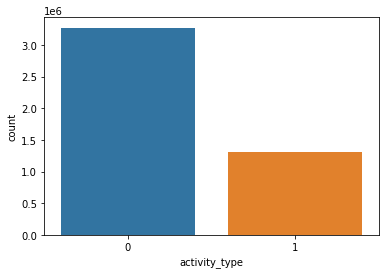

In [7]:
import seaborn as sns

sns.countplot(x = "activity_type", data = df, order = df.activity_type.value_counts().index)

In [11]:
new_df = df[['X-Axis' ,'Y-Axis', 'Z-Axis' , 'activity_type', 'ActivityEncoded']]

In [12]:
new_df

,X-Axis,Y-Axis,Z-Axis,activity_type,ActivityEncoded
32,-0.138750,0.886872,0.331029,0,0
33,-0.138140,0.886507,0.332372,0,0
34,-0.134844,0.889558,0.331150,0,0
35,-0.140215,0.886628,0.333714,0,0
36,-0.139117,0.886262,0.334568,0,0
...,...,...,...,...,...
5587,-60.833332,-8.333333,114.500000,1,15
5588,-61.833332,-8.833333,115.000000,1,15
5589,-60.500000,-7.500000,115.166664,1,15
5590,-59.666668,-8.333333,115.500000,1,15


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('activity_type', axis=1).values , df['activity_type'].values, 
                                                    test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2287223, 10), (2287224, 10), (2287223,), (2287224,))

In [18]:
df['activity_type'].value_counts()

0    3271558
1    1302889
Name: activity_type, dtype: int64

In [20]:
fall = (df['activity_type'] == 1).sum()
normal = (df['activity_type'] == 0).sum()

total = fall + normal

print(f"Total = {total:,}")
print(f"Fraud = {fall/total*100:,.2f}%")
print(f"Normal = {normal/total*100:,.2f}%")

Total = 4,574,447
Fraud = 28.48%
Normal = 71.52%


In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train_normal = X_train[y_train == 0]
X_train_fall = X_train[y_train == 1]

X_train_normal.shape, X_train_fall.shape

((1635122, 10), (652101, 10))

In [23]:
X_test_normal = X_test[y_test == 0]
X_test_fall = X_test[y_test == 1]

X_test_normal.shape, X_test_fall.shape

((1636436, 10), (650788, 10))

In [24]:
def encoder_model(input_dim, latent_dim):
    prior = tfd.MultivariateNormalDiag(
            loc=tf.zeros([latent_dim]),
            scale_diag=tf.ones([latent_dim]))
    
    encoder_input = Input(shape=(input_dim,))
    x = Dense(20, activation=tf.nn.leaky_relu)(encoder_input)
    x = Dense(15, activation=tf.nn.leaky_relu)(x)
    x = Dense(tfp.layers.MultivariateNormalTriL.params_size(latent_dim), activation=None)(x)
    encoded = tfp.layers.MultivariateNormalTriL(latent_dim, 
                        activity_regularizer=tfp.layers.KLDivergenceRegularizer(prior))(x)
    encoder = Model(encoder_input, encoded)
    return encoder

def decoder_model(latent_dim, input_dim):
    decoder_input = Input(shape=(latent_dim,))
    x = Dense(15, activation=tf.nn.leaky_relu)(decoder_input)
    x = Dense(20, activation=tf.nn.leaky_relu)(x)
    x = Dense(tfp.layers.IndependentNormal.params_size(input_dim), activation=None)(x)
    decoded = tfp.layers.IndependentNormal(input_dim)(x)

    decoder = Model(decoder_input, decoded)
    return decoder

def vae_model(encoder, decoder):
    vae = Model(inputs=encoder.inputs,
                outputs=decoder(encoder.outputs[0]))

    negloglik = lambda x, rv_x: -rv_x.log_prob(x)

    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss=negloglik)
    return vae

In [25]:
input_dim = X_train_normal.shape[1]

# latent_dim = 5
latent_dim = 2

encoder = encoder_model(input_dim, latent_dim)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 multivariate_normal_tri_l (  ((None, 2),              0         
 MultivariateNormalTriL)      (None, 2))                         
                                                                 
Total params: 615
Trainable params: 615
Non-trainable params: 0
_______________________________________________________________

In [26]:
decoder = decoder_model(latent_dim, input_dim)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 15)                45        
                                                                 
 dense_4 (Dense)             (None, 20)                320       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 independent_normal (Indepen  ((None, 10),             0         
 dentNormal)                  (None, 10))                        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_____________________________________________________________

In [27]:
vae = vae_model(encoder, decoder)
vae.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 multivariate_normal_tri_l (  ((None, 2),              0         
 MultivariateNormalTriL)      (None, 2))                         
                                                                 
 model_1 (Functional)        (None, 10)                785       
                                                           

In [28]:
batch_size = 128
max_epochs = 100

s = time.time()

checkpointer = ModelCheckpoint(filepath='bestmodel.h5', verbose=0, save_best_only=True)

earlystopper = EarlyStopping(monitor='val_loss', mode='min', 
                             patience=10, verbose=0, restore_best_weights=True)

history = vae.fit(X_train_normal, X_train_normal, 
                  epochs=max_epochs, batch_size=128, shuffle=True,
                  verbose=1, validation_data=(X_test_normal, X_test_normal),
                  callbacks=[earlystopper, checkpointer])

Epoch 1/100
12775/12775 [==============================] - 38s 3ms/step - loss: 3.8457 - val_loss: 1.4809
Epoch 2/100
12775/12775 [==============================] - 33s 3ms/step - loss: 1.9415 - val_loss: 1.2223
Epoch 3/100
12775/12775 [==============================] - 32s 3ms/step - loss: 1.4072 - val_loss: 0.6880
Epoch 4/100
12775/12775 [==============================] - 34s 3ms/step - loss: 0.9828 - val_loss: 0.2181
Epoch 5/100
12775/12775 [==============================] - 33s 3ms/step - loss: 0.5927 - val_loss: -0.5099
Epoch 6/100
12775/12775 [==============================] - 35s 3ms/step - loss: -0.0354 - val_loss: 5.2673
Epoch 7/100
12775/12775 [==============================] - 33s 3ms/step - loss: -0.4043 - val_loss: -1.1646
Epoch 8/100
12775/12775 [==============================] - 32s 3ms/step - loss: -0.0126 - val_loss: -1.0795
Epoch 9/100
12775/12775 [==============================] - 32s 3ms/step - loss: -0.2206 - val_loss: -1.2533
Epoch 10/100
12775/12775 [============

In [29]:
print(f"경과 시간: {(time.time() - s) / 60} 분")

경과 시간: 22.83878333568573 분


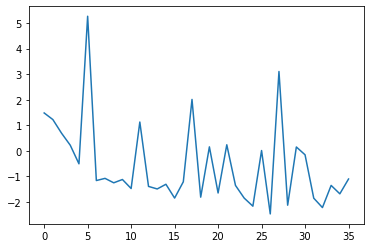

In [30]:
plt.plot([v for v in history.history['val_loss'] if v < 50])

In [31]:
vae.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 multivariate_normal_tri_l (  ((None, 2),              0         
 MultivariateNormalTriL)      (None, 2))                         
                                                                 
 model_1 (Functional)        (None, 10)                785       
                                                           

In [32]:
# 정상 sample 무작위 sampling 
idx = np.random.choice(len(X_train_normal), 250, replace=False)
Nom_data = X_train_normal[idx]
Nom_data.shape 

(250, 10)

In [33]:
# 정상 데이터의 재구성 결과 값
Nom_pred = vae.predict(Nom_data)  
# 재구성 오류 -  input/output 간의 MSE 구하기
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) 

print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse': Nom_pred_mse})
print(Nom_pred_mse_df.describe())

8/8 [==============================] - 1s 1ms/step
Normal Metric
       Normal_mse
count  250.000000
mean     1.287383
std      1.979336
min      0.021676
25%      0.317817
50%      0.651729
75%      1.316536
max     15.300871


In [34]:
# 비정상 data의 재구성 결과값
ANom_pred = vae.predict(X_train_fall)   
# 재구성 오류 -  input/output 간의 MSE 구하기
ANom_pred_mse = np.mean(np.power(X_train_fall- ANom_pred, 2), axis=1) 

print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

20379/20379 [==============================] - 19s 944us/step
Anomaly Metric
         Anomaly_mse
count  652101.000000
mean        1.807445
std         2.343798
min         0.000889
25%         0.556815
50%         1.042227
75%         2.128824
max        82.816278


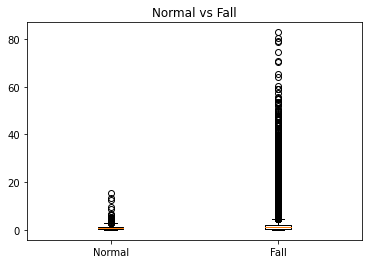

In [48]:
plt.boxplot([Nom_pred_mse, ANom_pred_mse])
plt.title('Normal vs Fall')
plt.xticks(ticks=[1, 2], labels=['Normal', 'Fall'])
plt.show()

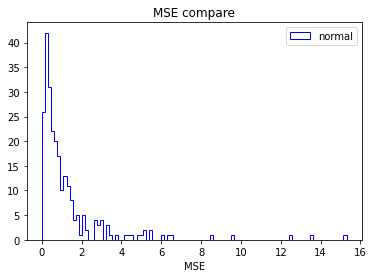

In [47]:
plt.title('MSE compare') 
plt.hist(Nom_pred_mse, bins=100, color='blue', histtype='step', label='normal') 
#plt.hist(ANom_pred_mse, bins=100, color='red', histtype='step', label='abnormal') 
plt.xlabel('MSE')
plt.legend()
plt.show()

In [43]:
# train set의 재구성 오류 계산 (0 - 정상, 1 - 사기)
predictions = vae.predict(X_train)

mse = np.mean(np.power(X_train - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_train})

71476/71476 [==============================] - 71s 990us/step


In [44]:
desc = error_df.groupby('true_class').describe()
desc

reconstruction_error                                         \
                          count      mean       std      min       25%   
true_class                                                               
0                     1635122.0  1.431376  2.233013  0.00101  0.335555   
1                      652101.0  1.805020  2.342540  0.00165  0.557510   

                                            
                 50%       75%         max  
true_class                                  
0           0.706342  1.545982  102.913041  
1           1.041202  2.122798   90.408619

In [45]:
mean = desc['reconstruction_error']['mean'][0]
std = desc['reconstruction_error']['std'][0]

thresholds = {'3sigma': mean + 3*std, 
                   '2.5sigma': mean + 2.5*std, 
                     "2sigma": mean + 2*std}
mean, std, thresholds

(1.4313759845875411,
 2.233012711799273,
 {'3sigma': 8.13041411998536,
  '2.5sigma': 7.013907764085723,
  '2sigma': 5.897401408186087})

71476/71476 [==============================] - 67s 938us/step
Precision 0.33
Recall 0.05


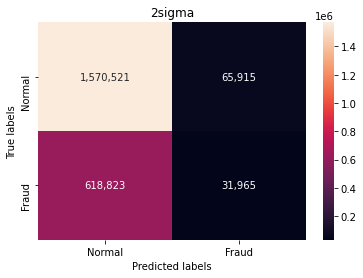

71476/71476 [==============================] - 65s 912us/step
Precision 0.32
Recall 0.03


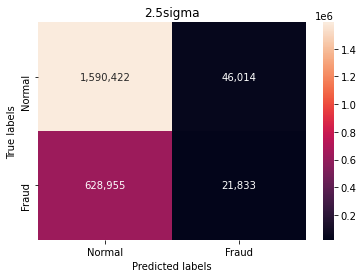

71476/71476 [==============================] - 64s 898us/step
Precision 0.32
Recall 0.02


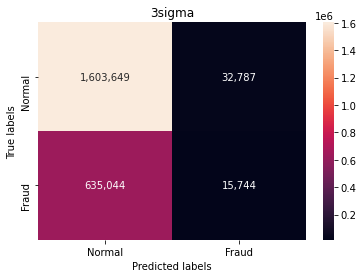

In [46]:
thresholds = sorted(thresholds.items(), key=lambda kv: kv[1])

def model_predict(threshold, mse):
     predictions = [(lambda er: 1 if er > threshold else 0)(er) for er in mse]
     return predictions

for sigma, threshold in thresholds:
    
    test_predictions = vae.predict(X_test)
    mse = np.mean(np.power(X_test - test_predictions, 2), axis=1)
    y_pred = model_predict(threshold, mse)

    print("Precision {:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall {:.2f}".format(recall_score(y_test, y_pred)))

    cm = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['Normal', 'Fraud'])
    ax.yaxis.set_ticklabels(['Normal', 'Fraud'])
    ax.set(yticks=[0.5, 1.5], xticks=[0.5, 1.5])
    ax.set_title(sigma)
    plt.show()